# Real Estate Price Prediction

User want to know the price of the house of unit area depends on 6 parameter as mentioned below.
Transaction date, house age, distance to the nearest MRT station, number of convenience stores in the living circle, geographic coordinate latitude, geographic coordinate longitude.

- Attribute Information:

- The inputs are as follows
- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- X2=the house age (unit: year)
- X3=the distance to the nearest MRT station (unit: meter)
- X4=the number of convenience stores in the living circle on foot (integer)
- X5=the geographic coordinate, latitude. (unit: degree)
- X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

# Importing required libraries for the project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Loading real estate dataset from git hub account

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Realdf = pd.read_csv('https://raw.githubusercontent.com/Manju410/MLPractice/main/Real_Estate_Price_Prediction/RealEstatCleanUp.csv')
Realdf = pd.read_csv('/content/drive/MyDrive/RealEstatCleanUp.csv')

In [ ]:
Realdf.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,734808,32.0,84.87882,10,24.98298,121.54024,37.9
1,734808,19.5,306.59470,9,24.98034,121.53951,42.2
2,735050,13.3,561.98450,5,24.98746,121.54391,47.3
3,735020,13.3,561.98450,5,24.98746,121.54391,54.8
4,734777,5.0,390.56840,5,24.97937,121.54245,43.1


- Number of rows and columns in the dataset

In [ ]:
Realdf.shape

(414, 7)

- There are 414 rows and 8 columns in the above dataset

- Information about dataset like datatype,count etc

In [ ]:
Realdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int64  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


# Summary of above output
- Above dataset contains 8 columns.
- Two columns are integer datatype and Six columns are float datatype.
- Above dataset doesnot have any null values or empty values.
- Above dataset have 414 etries total

- Extract Train Test Dataset

- -1 = except last column( house price of unit area) loading all rows and columns to X variable

In [ ]:
X = Realdf.iloc[:,:-1]
y = Realdf['Y house price of unit area'].values.reshape(-1,1)

- Converting y values to 2 dimensional array

In [ ]:
X.shape,y.shape

((414, 6), (414, 1))

In [ ]:
414-138

276

In [ ]:
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,734808,32.0,84.87882,10,24.98298,121.54024
1,734808,19.5,306.59470,9,24.98034,121.53951
2,735050,13.3,561.98450,5,24.98746,121.54391
3,735020,13.3,561.98450,5,24.98746,121.54391
4,734777,5.0,390.56840,5,24.97937,121.54245


# Lets Change Distance from meter to Kilometers

In [ ]:
X[X.columns[2]] = X[X.columns[2]]/1000
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,734808,32.0,0.084879,10,24.98298,121.54024
1,734808,19.5,0.306595,9,24.98034,121.53951
2,735050,13.3,0.561984,5,24.98746,121.54391
3,735020,13.3,0.561984,5,24.98746,121.54391
4,734777,5.0,0.390568,5,24.97937,121.54245


# KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.metrics import mean_squared_error

In [19]:
knnmodel = KNeighborsRegressor()

In [61]:
knnmodel

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [20]:
from sklearn.model_selection import cross_val_score

In [43]:
model_scores = cross_val_score(knnmodel,X,y,scoring='r2',cv=20)

In [44]:
model_scores

array([ 0.243356  ,  0.66843218,  0.54547365,  0.59141909,  0.50292287,
        0.04572663, -0.18053111,  0.21769919,  0.37502416,  0.19707296,
       -0.12816822,  0.2178262 ,  0.08348458, -0.29702475,  0.22683788,
        0.52710411,  0.33664102,  0.22241223,  0.04396397,  0.49429791])

In [45]:
model_scores.mean()

0.24669852651502805

In [47]:
mean_scores={}
for n_fold in range(2,100):
  m_score = cross_val_score(knnmodel,X,y,scoring='r2',cv=n_fold)
  mean_scores[n_fold]=m_score.mean()




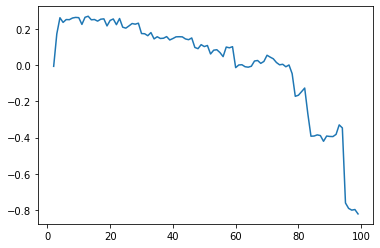

In [50]:
plt.plot(list(mean_scores.keys()) , list(mean_scores.values()))

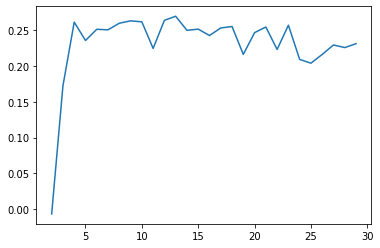

In [51]:
mean_scores={}
for n_fold in range(2,30):
  m_score = cross_val_score(knnmodel,X,y,scoring='r2',cv=n_fold)
  mean_scores[n_fold]=m_score.mean()

plt.plot(list(mean_scores.keys()) , list(mean_scores.values()))

In [52]:
max(zip(mean_scores.values(), mean_scores.keys()))

(0.26963300791347644, 13)

In [53]:
mean_scores[10]

0.2618221552157668

In [54]:
ngb_scores = {}
for n_ngb in range(1,31):
  mdl = KNeighborsRegressor(n_neighbors=n_ngb)
  scores = cross_val_score(mdl,X,y,scoring='r2',cv=10)
  ngb_scores[n_ngb]= scores.mean()



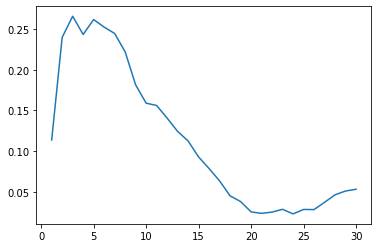

In [55]:
plt.plot(list(ngb_scores.keys()) , list(ngb_scores.values()))

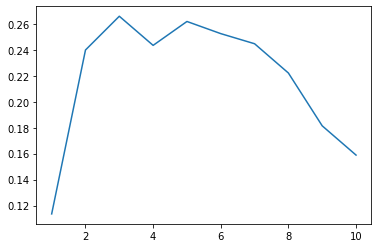

In [56]:
ngb_scores = {}
for n_ngb in range(1,11):
  mdl = KNeighborsRegressor(n_neighbors=n_ngb)
  scores = cross_val_score(mdl,X,y,scoring='r2',cv=10)
  ngb_scores[n_ngb]= scores.mean()

plt.plot(list(ngb_scores.keys()) , list(ngb_scores.values()))

In [58]:
max(zip(ngb_scores.values(), ngb_scores.keys()))

(0.265853616774079, 3)

In [62]:
grid_params = {"n_neighbors":range(2,10),
               "p":[1,2,3]
               }


In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
grid_model = GridSearchCV(knnmodel,grid_params,scoring='r2',cv=10)

In [65]:
grid_model.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(2, 10), 'p': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [66]:
grid_model.cv_results_

{'mean_fit_time': array([0.00196052, 0.00151188, 0.00172825, 0.00163865, 0.00187783,
        0.00188823, 0.00196373, 0.0014811 , 0.0015753 , 0.001492  ,
        0.00143852, 0.00158172, 0.00148053, 0.00154457, 0.00161889,
        0.001491  , 0.00161276, 0.00162196, 0.00156591, 0.00162177,
        0.00164917, 0.0015228 , 0.00191247, 0.00173786]),
 'mean_score_time': array([0.00172501, 0.00152943, 0.00355649, 0.00169384, 0.0019913 ,
        0.00378754, 0.00190694, 0.00153446, 0.00344708, 0.00155132,
        0.00144897, 0.00337431, 0.00157487, 0.00164118, 0.00372908,
        0.00156271, 0.00163476, 0.0034708 , 0.00161376, 0.00164909,
        0.00345914, 0.00166209, 0.00190773, 0.0037339 ]),
 'mean_test_score': array([0.28904111, 0.23985183, 0.21375719, 0.3288652 , 0.26585362,
        0.22664401, 0.33160438, 0.24341849, 0.23456052, 0.33005621,
        0.26182216, 0.23408032, 0.31915433, 0.25246694, 0.20876032,
        0.28805784, 0.24467057, 0.20006296, 0.28306414, 0.22211682,
        0.184

In [67]:
df = pd.DataFrame(grid_model.cv_results_)

In [70]:
df

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'param_p', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [73]:
df[['rank_test_score','params','mean_test_score','std_test_score']].sort_values('rank_test_score')

,rank_test_score,params,mean_test_score,std_test_score
6,1,"{'n_neighbors': 4, 'p': 1}",0.331604,0.154340
9,2,"{'n_neighbors': 5, 'p': 1}",0.330056,0.160763
3,3,"{'n_neighbors': 3, 'p': 1}",0.328865,0.156127
12,4,"{'n_neighbors': 6, 'p': 1}",0.319154,0.158356
0,5,"{'n_neighbors': 2, 'p': 1}",0.289041,0.196260
15,6,"{'n_neighbors': 7, 'p': 1}",0.288058,0.148867
18,7,"{'n_neighbors': 8, 'p': 1}",0.283064,0.117373
21,8,"{'n_neighbors': 9, 'p': 1}",0.269961,0.118731
4,9,"{'n_neighbors': 3, 'p': 2}",0.265854,0.130664
10,10,"{'n_neighbors': 5, 'p': 2}",0.261822,0.140151


In [74]:
grid_model.best_score_

0.3316043803113853

In [75]:
grid_model.best_params_

{'n_neighbors': 4, 'p': 1}

In [76]:
grid_model.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=1,
                    weights='uniform')